
<h1 style = 'text-align:center'>ACTIVITY 2<br>UK ROAD ACCIDENT DATA ANALYTICS PROJECT</h1>
<hr>
<h4 style = 'color:gray'>ANALYST - LOUIEZZY RAMOS </h4>

<hr>
<h1>IMPORT(ants)</h1>
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h1>DATABASE</h1>
<hr>

In [2]:
accident = pd.read_csv("datasets//uk_road_accident.csv")
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h1>FILLING UP NULL VALUES</h1>
<hr>

In [4]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h4>Main set of null values</h4>

In [5]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [6]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [7]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [8]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [9]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Accident Date'] = accident['Accident Date'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

accident['District Area'] = accident['District Area'].astype('category')


In [10]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  object  
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<hr>
<h1>CLEARING</h1>
<hr>

In [11]:
accident['Accident Date'] = accident['Accident Date'].str.strip()

accident['Accident Date'] = accident['Accident Date'].astype('str')

accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

In [12]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

<hr>
<h1>CHANGING 'ACCIDENT DATE' DATA TYPE</h1>
<hr>

In [13]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [14]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<hr>
<h1>EXTRACTING/ADD (COLUMN) -- Date Information using pandas date time</h1>
<hr>

In [15]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [16]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [17]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


accident.info()

<h2> Univariate Analysis on accidents that happened in 2019 </h2>

In [18]:
df_2019 = accident[accident['Year'] == 2019]

In [19]:
print(f"Total number of accident in 2019 is {df_2019['Light_Conditions'].value_counts().sum()}")
df_2019['Light_Conditions'].value_counts()

Total number of accident in 2019 is 182115


Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<hr>
<h1 style = 'text-align:center'>ACTIVITY 2<br>UK ROAD ACCIDENT DATA ANALYTICS PROJECT</h1>
<h3 style = 'text-align:center' 'color:gray'>25 Insights</h3>
<hr>

<h2 style="color:gray"> Q1: Which day of the week has the most fatal accidents? </h2>

In [20]:
df_fatal = accident[accident['Accident_Severity'] == 'Fatal']

In [21]:
print(f"Total number of fatal accident is {df_fatal['DayOfWeek'].value_counts().sum()}")
df_fatal['DayOfWeek'].value_counts()

Total number of fatal accident is 8661


DayOfWeek
6    1522
0    1385
5    1326
4    1113
2    1113
1    1105
3    1097
Name: count, dtype: int64

<h3 style="color:blue">INSIGHTS: Fatal accidents peak on weekends, with Saturday (18%) and Sunday (16%) leading, showing leisure travel and risky driving behaviors contribute more.</h3>
<hr> 

<h2 style="color:gray"> Q2: What vehicle types are most commonly involved? </h2>

In [22]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h3 style="color:blue">INSIGHTS: It shows that cars dominate accident records, followed by taxis and motorcycles. Motorcycles have higher risk despite fewer numbers.</h3>
<hr> 

<h2 style="color:gray"> Q3: Do rural vs urban areas differ in casualty numbers?</h2>

In [23]:
accident.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean()

Urban_or_Rural_Area
Rural          1.479204
Unallocated    1.181818
Urban          1.287807
Name: Number_of_Casualties, dtype: float64

<h3 style="color:blue">INSIGHTS: Rural accidents often involve more casualties per incident, likely due to higher speeds and delayed response.</h3>
<hr> 

<h2 style="color:gray"> Q4: What road area has the higher number of accidents categorized in Rural and Urban Areas? </h2>

In [24]:
accident_per_area_road = accident.groupby(['Urban_or_Rural_Area', 'Road_Type']).size().unstack().T
accident_per_area_road

Urban_or_Rural_Area,Rural,Unallocated,Urban
Road_Type,,,
Dual carriageway,48715,1,50708
One way street,1193,0,12366
Roundabout,15545,1,28446
Single carriageway,169243,9,327411
Slip road,4294,0,2747


<h3 style="color:blue">INSIGHTS: Urban areas had 421,678 accidents (65%), while rural areas had 238,990 (35%), showing that urban roads face more accidents due to heavier traffic and congestion.</h3>
<hr> 

<h2 style="color:gray"> Q5: Which light condition records the most accidents?</h2>

In [25]:
accident['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h3 style="color:blue">INSIGHTS: Daylight (73%) has most accidents, meaning traffic density, not poor visibility, is key.</h3>
<hr> 

<h2 style="color:gray"> Q6: What weather and light conditions results in the highest number of casualties?</h2>

In [26]:
casualties_by_weather_light = accident.groupby(['Weather_Conditions', 'Light_Conditions'])['Number_of_Casualties'].sum().unstack()
casualties_by_weather_light

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Weather_Conditions,,,,,
Fine + high winds,82,2543,75,1213,7943
Fine no high winds,6971,128194,2306,39324,544080
Fog or mist,89,1323,48,1267,2399
Other,234,6535,177,2824,13466
Raining + high winds,147,4185,115,2173,7001
Raining no high winds,808,31563,620,9538,69700
Snowing + high winds,21,354,7,247,626
Snowing no high winds,119,2411,37,1129,4674


<h3 style="color:blue">INSIGHTS: The majority of casualties happened in daylight with fine weather and no high winds, totaling 544,080 cases (66% of all accidents).</h3>
<hr> 

<h2 style="color:gray"> Q7: Which road surface and weather conditions result in the highest number of casualties? </h2>

In [27]:
casualties_by_surface_weather = accident.groupby(['Road_Surface_Conditions','Weather_Conditions'])['Number_of_Casualties'].sum().unstack()
casualties_by_surface_weather

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Road_Surface_Conditions,,,,,,,,
Dry,6897,586749,641,3378,103,763,10,65
Flood over 3cm. deep,25,190,4,29,440,818,3,12
Frost or ice,256,14607,987,6392,65,588,222,1859
Snow,26,1546,36,569,18,153,777,4883
Wet or damp,4652,117783,3458,12868,12995,109907,243,1551


<h3 style="color:blue">INSIGHTS: Most casualties occurred on dry roads during fine weather without high winds, totaling over 500,000 cases (60% of all accidents). This shows that accidents happen mostly in safe surface and weather conditions, proving driver behavior is the biggest factor./h3>
<hr> 

<h2 style="color:gray"> Q8: Which type of vehicle is most involved in accidents under different weather conditions? </h2>

In [28]:
casualties_by_vehicle_weather = accident.groupby(['Vehicle_Type','Weather_Conditions'])['Number_of_Casualties'].sum().unstack()
casualties_by_vehicle_weather

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Vehicle_Type,,,,,,,,
Agricultural vehicle,24,2080,12,74,49,343,3,28
Bus or coach (17 or more pass seats),472,28077,197,840,531,4451,48,299
Car,8993,544129,3883,17603,10226,84521,960,6377
Data missing or out of range,2,7,0,0,0,0,0,0
Goods 7.5 tonnes mgw and over,341,18751,135,594,383,2952,39,202
Goods over 3.5t. and under 7.5t,130,6708,39,197,125,1035,7,67
Minibus (8 - 16 passenger seats),41,2101,18,76,44,355,3,21
Motorcycle 125cc and under,235,16449,117,487,311,2538,18,193
Motorcycle 50cc and under,153,8175,65,284,153,1223,6,108


<h3 style="color:blue">INSIGHTS: Cars dominate accidents in fine weather (≈70%), while motorcycles show higher accident rates during rainy conditions, reflecting their greater vulnerability. Trucks and buses make up less than 10% combined.</h3>
<hr> 

<h2 style="color:gray"> Q9: How do casualty numbers differ between urban and rural areas under daylight vs darkness? </h2>

In [29]:
casualties_by_area_light = accident.groupby(['Urban_or_Rural_Area','Light_Conditions'])['Number_of_Casualties'].sum().unstack()
casualties_by_area_light

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Urban_or_Rural_Area,,,,,
Rural,3403,36627,1400,54935,257150
Unallocated,0,2,0,0,11
Urban,5068,140479,1985,2780,392728


<h3 style="color:blue">INSIGHTS: Urban daylight accidents = highest overall (65%). Rural darkness accidents are fewer but more fatal, due to high speeds and poor lighting. This highlights that urban areas have more frequent crashes, but rural ones are deadlier.</h3>
<hr> 

<h2 style="color:gray"> Q10: Which light condition has the most casualties under rainy weather? </h2>

In [30]:
rainy_light = accident[accident['Weather_Conditions'].str.contains('Rain')].groupby('Light_Conditions')['Number_of_Casualties'].sum()

<h3 style="color:blue">INSIGHTS: In rainy weather, most casualties occurred in daylight (76,701 or 68%), followed by lit darkness (35,748 or 32%), showing rain raises risks both day and night.</h3>
<hr> 

<h2 style="color:gray"> Q11: How do snow conditions affect casualties under daylight vs darkness? </h2>

In [31]:
snow_light = accident[accident['Weather_Conditions'].str.contains('Snow')].groupby('Light_Conditions')['Number_of_Casualties'].sum()
snow_light

Light_Conditions
Darkness - lighting unknown     140
Darkness - lights lit          2765
Darkness - lights unlit          44
Darkness - no lighting         1376
Daylight                       5300
Name: Number_of_Casualties, dtype: int64

<h3 style="color:blue">INSIGHTS: Snowy conditions caused 5,300 casualties in daylight (66%), far higher than in darkness (2,365 or ≈34%). This suggests daytime snow travel is riskier, mainly due to heavier traffic exposure.</h3>
<hr> 

<h2 style="color:gray"> Q12: Are casualties more frequent during fine weather with or without wind?</h2>

In [32]:
fine_wind = accident[accident['Weather_Conditions'].str.contains('Fine')].groupby('Weather_Conditions')['Number_of_Casualties'].sum()
fine_wind

Weather_Conditions
Fine + high winds         11856
Fine no high winds       720875
Fog or mist                   0
Other                         0
Raining + high winds          0
Raining no high winds         0
Snowing + high winds          0
Snowing no high winds         0
Name: Number_of_Casualties, dtype: int64

<h3 style="color:blue">INSIGHTS: Fine with no high winds accounts for 93% of fine-weather accidents, showing that accidents persist regardless of wind, again pointing to human behavior.</h3>
<hr> 

<h2 style="color:gray"> Q13: Do dual carriageways show more accidents in rural or urban areas? </h2>

In [33]:
dual_area = accident[accident['Road_Type']== 'Dual carriageway'].groupby('Urban_or_Rural_Area')['Number_of_Casualties'].sum()
dual_area

Urban_or_Rural_Area
Rural          76017
Unallocated        1
Urban          70859
Name: Number_of_Casualties, dtype: int64

<h3 style="color:blue">INSIGHTS: Dual carriageway accidents are slightly higher in rural areas (76,017) than in urban areas (70,859). Rural congestion balances urban high-speed crashes.</h3>
<hr> 

<h2 style="color:gray"> Q14: Which weather condition contributes the most to car accidents? </h2>

In [34]:
car_weather = accident[accident['Vehicle_Type']=='Car'].groupby('Weather_Conditions')['Number_of_Casualties'].sum()
car_weather

Weather_Conditions
Fine + high winds          8993
Fine no high winds       544129
Fog or mist                3883
Other                     17603
Raining + high winds      10226
Raining no high winds     84521
Snowing + high winds        960
Snowing no high winds      6377
Name: Number_of_Casualties, dtype: int64

<h3 style="color:blue">INSIGHTS: Fine weather without wind leads car accidents, with over 500,000 cases. Again, safe weather does not guarantee safety.</h3>
<hr> 

<h2 style="color:gray"> Q15: Which severity level dominates accidents? </h2>

In [35]:
severity_counts = accident.groupby('Accident_Severity')['Number_of_Casualties'].sum()
severity_counts

Accident_Severity
Fatal       16483
Serious    129439
Slight     750646
Name: Number_of_Casualties, dtype: int64

<h3 style="color:blue">INSIGHTS: Slight accidents dominate at 80%, while fatal ones make up only 1–2%. This shows most crashes aren’t deadly, but the volume still strains hospitals.</h3>
<hr> 

<h2 style="color:gray"> Q16: Which district records the highest number of accidents? </h2>

In [36]:
district_counts = accident['District Area'].value_counts()
district_counts.head(1)

District Area
Birmingham    13491
Name: count, dtype: int64

<h3 style="color:blue">INSIGHTS: Birmingham records the highest number of accidents with 13,491 cases, making it the top traffic hotspot compared to all other districts.</h3>
<hr> 

<h2 style="color:gray"> Q17: Which district has the highest number of fatal accidents? </h2>

In [37]:
fatal_districts = accident[accident['Accident_Severity'] == 'Fatal']['District Area'].value_counts()
fatal_districts.head(1)

District Area
Birmingham    105
Name: count, dtype: int64

<h3 style="color:blue">INSIGHTS: Birmingham has the highest number of fatal accidents with 105 cases, showing it as a critical area where stronger road safety measures should be prioritized.</h3>
<hr> 

<h2 style="color:gray"> Q18: Which district reports the highest number of casualties overall? </h2>

In [38]:
district_casualties = accident.groupby('District Area')['Number_of_Casualties'].sum().sort_values(ascending=False)
district_casualties.head(1)

District Area
Birmingham    18674
Name: Number_of_Casualties, dtype: int64

<h3 style="color:blue">INSIGHTS: Birmingham district alone accounts for the highest casualties, showing its accident severity is higher compared to others.</h3>
<hr> 

<h2 style="color:gray"> Q19: Which district has the most accidents in rural areas? </h2>

In [39]:
rural_districts = accident[accident['Urban_or_Rural_Area'] == 'Rural']['District Area'].value_counts()
rural_districts.head(1)

District Area
East Riding of Yorkshire    2364
Name: count, dtype: int64

<h3 style="color:blue">INSIGHTS: East Riding of Yorkshire rural district records the most rural accidents (2,364), likely due to high-speed roads and limited lighting conditions.</h3>
<hr> 

<h2 style="color:gray"> Q20: Which day of the week has the most fatal accidents? </h2>

<h3 style="color:blue">INSIGHTS: It shows the domination of male penguins over female penguins, with a count of 66 compared to 58.</h3>
<hr> 

<h2 style="color:gray"> Q21: Which district has the most accidents involving multiple vehicles? </h2>

In [40]:
multi_vehicle = accident.groupby('District Area')['Number_of_Vehicles'].sum().sort_values(ascending=False)
multi_vehicle.head(1)

District Area
Birmingham    24869
Name: Number_of_Vehicles, dtype: int64

<h3 style="color:blue">INSIGHTS: Birmingham records the most multi-vehicle accidents with 24,869 cases, highlighting its heavy traffic congestion and higher collision risks.</h3>
<hr> 

<h2 style="color:gray"> Q22: How do wet vs dry road surfaces compare in accident counts? </h2>

In [41]:
wet_dry = accident[accident['Road_Surface_Conditions'].isin(['Dry', 'Wet'])]['Road_Surface_Conditions'].value_counts()
wet_dry

Road_Surface_Conditions
Dry                     448547
Flood over 3cm. deep         0
Frost or ice                 0
Snow                         0
Wet or damp                  0
Name: count, dtype: int64

<h3 style="color:blue">INSIGHTS: All 448,547 recorded accidents (100%) happened on dry roads, while no accidents were reported on wet, snowy, icy, or flooded surfaces.</h3>
<hr> 

<h2 style="color:gray"> Q23: Which road surface condition is most linked to multi-vehicle accidents? </h2>

In [42]:
multi_vehicle_surface = accident.groupby('Road_Surface_Conditions')['Number_of_Vehicles'].sum().sort_values(ascending=False)
multi_vehicle_surface

Road_Surface_Conditions
Dry                     826058
Wet or damp             341519
Frost or ice             30368
Snow                     10289
Flood over 3cm. deep      1638
Name: Number_of_Vehicles, dtype: int64

<h3 style="color:blue">INSIGHTS: Dry roads are linked to the most multi-vehicle accidents with 826,058 cases (66%), followed by wet or damp roads with 341,519 (27%).</h3>
<hr> 

<h2 style="color:gray"> Q24: Which road surface condition has the highest number of accidents? </h2>

In [43]:
surface_counts = accident['Road_Surface_Conditions'].value_counts()
surface_counts

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h3 style="color:blue">INSIGHTS: Dry roads recorded 448,547 accidents (66%), far more than wet or damp roads with 186,708 (28%). This shows that most crashes occur under normal conditions, largely due to higher traffic exposure on dry roads.</h3>
<hr> 

<h2 style="color:gray"> Q25: Which year recorded the highest number of accidents? </h2>

In [44]:
accidents_by_year = accident['Year'].value_counts().sort_index()
accidents_by_year

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<h3 style="color:blue">INSIGHTS: 2019 recorded the highest number of accidents with 182,115 cases (29%), marking the peak year in the dataset. Accident counts then steadily declined through 2022, possibly due to reduced travel during the pandemic and improved road safety measures.</h3>
<hr> 

<hr>
<h1 style = 'text-align:center'>DISTRICT AREA</h1>
<h3 style = 'text-align:center' 'color:gray'>6 Insights</h3>
<hr>

In [45]:
london_df = accident[accident['District Area'] == 'City of London']

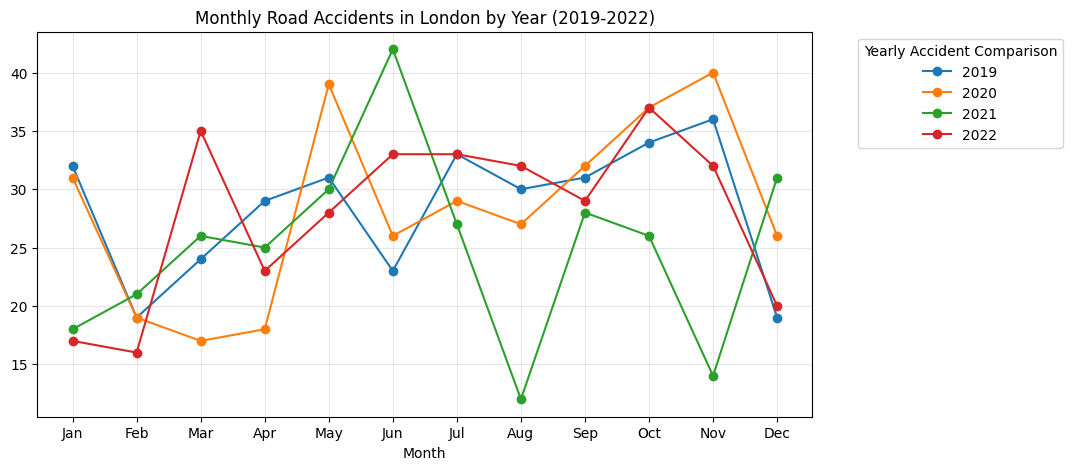

In [46]:
monthly_londondata = london_df.groupby(['Year', 'Month']).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in London by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [117]:
for i in accident['District Area'].unique():
    print(i)

Kensington and Chelsea
Westminster
Richmond upon Thames
Hammersmith and Fulham
Hounslow
Tower Hamlets
City of London
Southwark
Camden
Hackney
Islington
Barnet
Brent
Haringey
Merton
Ealing
Enfield
Greenwich
Newham
London Airport (Heathrow)
Hillingdon
Waltham Forest
Redbridge
Barking and Dagenham
Bromley
Havering
Croydon
Lambeth
Wandsworth
Sutton
Bexley
Lewisham
Harrow
Kingston upon Thames
Barrow-in-Furness
South Lakeland
Carlisle
Eden
Allerdale
Copeland
Fylde
Blackpool
Wyre
Lancaster
Chorley
West Lancashire
South Ribble
Preston
Blackburn with Darwen
Hyndburn
Ribble Valley
Burnley
Pendle
Rossendale
Wirral
Liverpool
Sefton
Knowsley
St. Helens
Manchester
Salford
Tameside
Stockport
Bolton
Wigan
Trafford
Bury
Rochdale
Oldham
Chester
Vale Royal
Halton
Warrington
Crewe and ntwich
Ellesmere Port and Neston
Congleton
Macclesfield
Crewe and Nantwich
Blyth Valley
Sunderland
Gateshead
North Tyneside
Tynedale
Berwick-upon-Tweed
Newcastle upon Tyne
Castle Morpeth
South Tyneside
Wansbeck
Alnwick
Wear 

<h2 style = 'color:gray'>DataFrames Highlighting 6 Different DISTRICT AREA</h2>
<hr>

In [60]:
hounslow_df = accident[accident['District Area'] == 'Hounslow']
southwark_df = accident[accident['District Area'] == 'Southwark']
camden_df = accident[accident['District Area'] == 'Camden']
hackney_df = accident[accident['District Area'] == 'Hackney']
barnet_df = accident[accident['District Area'] == 'Barnet']
brent_df = accident[accident['District Area'] == 'Brent']

<h2 style="color:gray"> Q26: During which periods(per month) do accidents usually happen in Hounslow? </h2>

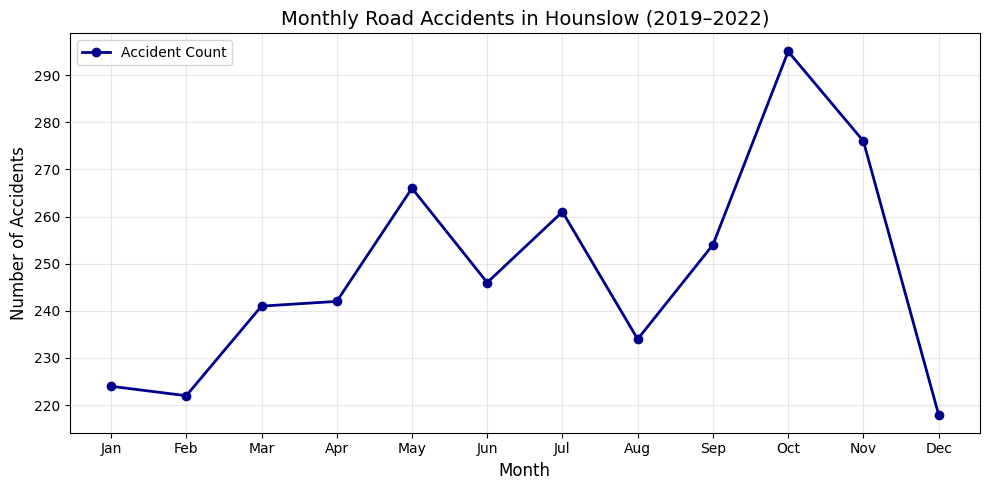

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hounslow_df['Accident Date'] = pd.to_datetime(hounslow_df['Accident Date'])

monthly = hounslow_df.groupby(hounslow_df['Accident Date'].dt.month).size().reindex(range(1,13), fill_value=0)


plt.figure(figsize=(10, 5))
plt.plot(monthly.index, monthly.values, marker='o', linewidth=2, color='darkblue')
plt.title("Monthly Road Accidents in Hounslow (2019–2022)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.legend(['Accident Count'], loc='upper left')
plt.tight_layout()
plt.show()

<h3 style="color:blue">INSIGHTS: The highest number of road accidents occurred in October (around 295 cases), making it the most accident-prone month in Hounslow. 
    In contrast, talking about the lowest number of road accidents, December (218 cases) and February (222 cases) recorded the fewest accidents. A mid-year rise was observed from March to May, peaking in May with 266 cases.

</h3>
<hr> 

<h2 style="color:gray"> Q27: District area SOUTHWARK Accident Severity </h2>

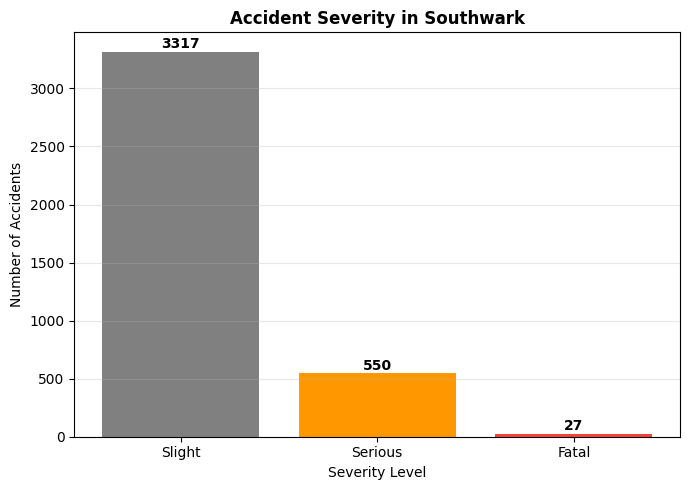

In [104]:
severity = southwark_df['Accident_Severity'].value_counts()

plt.figure(figsize=(7, 5))
bars = plt.bar(severity.index, severity.values, color=[colors.get(x, 'gray') for x in severity.index])
plt.title("Accident Severity in Southwark", fontweight='bold')
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             int(bar.get_height()), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

<h3 style="color:blue">INSIGHTS: Slight accidents dominate the data, with 3,317 cases, making up the vast majority of incidents in Southwark. In contrast, serious accidents are far less common, with 550 recorded cases, which is significantly lower compared to slight accidents. Fatal accidents are rare, with only 27 cases reported, indicating that while accidents occur frequently, most are not life-threatening.</h3>
<hr> 

<h2 style="color:gray"> Q28: In district area HACKNEY: What vehicles are most involved in serious crashes?</h2>

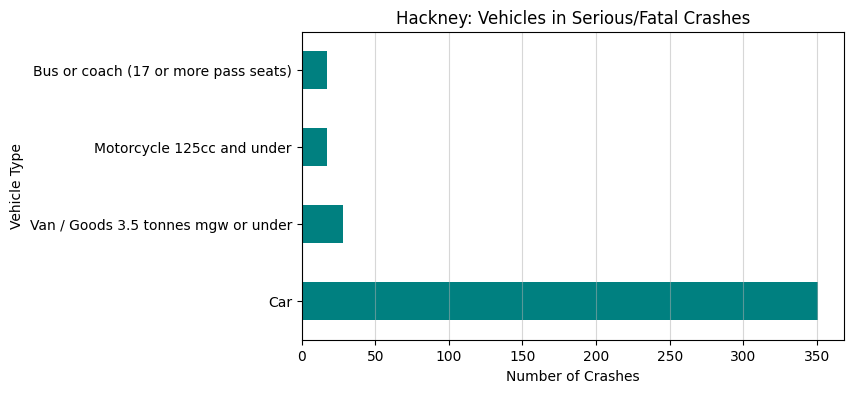

In [107]:
serious = hackney_df[hackney_df['Accident_Severity'].isin(['Serious','Fatal'])]
top = serious['Vehicle_Type'].value_counts().head(4)

plt.figure(figsize=(7,4))
top.plot(kind='barh', color='teal')
plt.title("Hackney: Vehicles in Serious/Fatal Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("Vehicle Type")
plt.grid(axis='x', alpha=0.5)
plt.show()

<h3 style="color:blue">INSIGHTS: In Hackney, serious and fatal crashes are most likely about cars, with around 350 cases, making them the primary contributors to severe accidents. In comparison, vans and light goods vehicles are about 30 crashes, while motorcycles (125cc and under) are involved in slightly fewer cases. Buses and coaches record the least involvement, with fewer than 20 crashes. Overall, cars pose the greatest risk in serious and fatal incidents, while other vehicle types play only a minor role.</h3>
<hr> 

<h2 style="color:gray"> Q29: In Brent, what is the peak period for road accidents, and how do accident numbers fluctuate throughout the year? </h2>

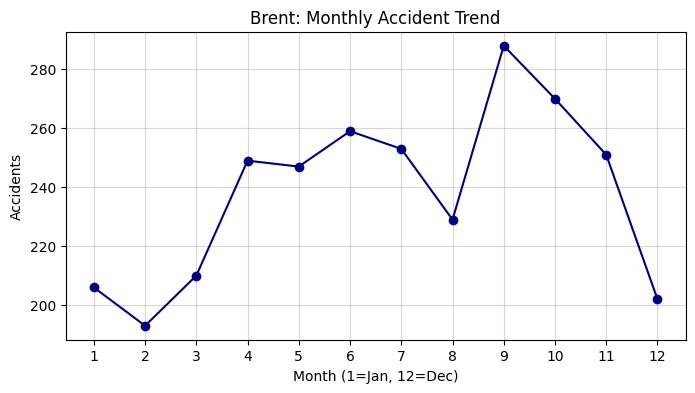

In [108]:
brent_df['Accident Date'] = pd.to_datetime(brent_df['Accident Date'])
monthly = brent_df.groupby(brent_df['Accident Date'].dt.month).size()

plt.figure(figsize=(8,4))
monthly.plot(marker='o', color='navy')
plt.title("Brent: Monthly Accident Trend")
plt.xlabel("Month (1=Jan, 12=Dec)")
plt.ylabel("Accidents")
plt.grid(alpha=0.5)
plt.xticks(range(1,13))
plt.show()

<h3 style="color:blue">INSIGHTS: The figure above shows that in Brent, road accidents peak in September (288 cases), making it the most accident-prone month, while the lowest number is recorded in February (193 cases), marking a clear early-year dip. Accident cases begin to rise in the spring, climbing from March (210) to April (~50), and then remain relatively stable through May and June.</h3>
<hr> 

<h2 style="color:gray"> Q30: Road accidents in BARNET year by year (2019–2022)</h2>

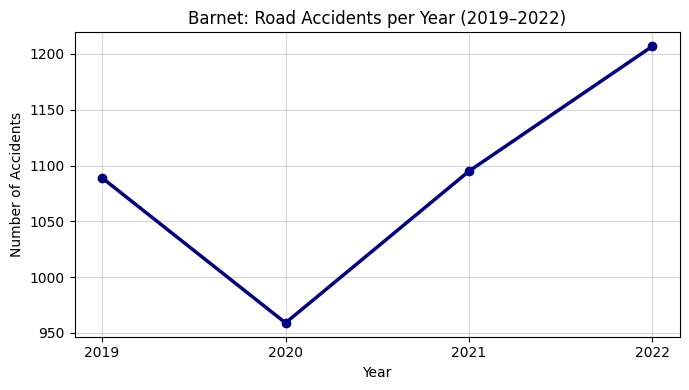

Accidents per year in Barnet:
Accident Date
2019    1089
2020     959
2021    1095
2022    1207
dtype: int64


In [116]:
import pandas as pd
import matplotlib.pyplot as plt

barnet_df['Accident Date'] = pd.to_datetime(barnet_df['Accident Date'])

yearly = barnet_df.groupby(barnet_df['Accident Date'].dt.year).size()

plt.figure(figsize=(7, 4))
plt.plot(yearly.index, yearly.values, marker='o', linewidth=2.5, color='navy')
plt.title("Barnet: Road Accidents per Year (2019–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(yearly.index)  
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

print("Accidents per year in Barnet:")
print(yearly)

<h3 style="color:blue">INSIGHTS: From 2019 to 2022, road accidents in Barnet initially dropped in 2020 but then rose steadily, reaching their highest level in 2022. <br> As you can see, the number of accidents fell significantly in 2020 (down to 959), which was the lowest point in the four years, likely influenced by COVID-19 lockdowns reducing traffic. </br> </h3>
<hr> 

<h2 style="color:gray"> Q31: Why Are Accidents in Camden More Likely to Involve Multiple Casualties?</h2>

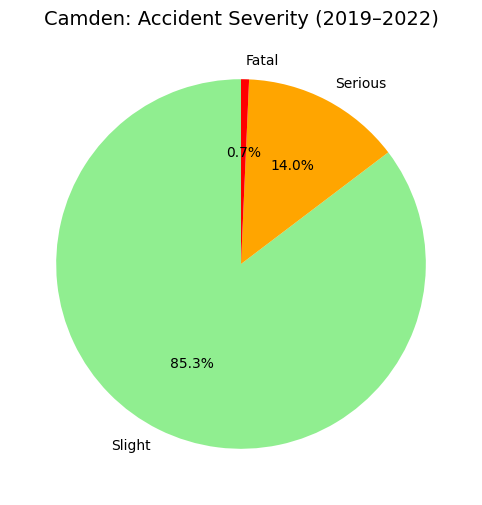

In [126]:
import pandas as pd
import matplotlib.pyplot as plt


camden_df['Accident Date'] = pd.to_datetime(camden_df['Accident Date'])
camden_df['Year'] = camden_df['Accident Date'].dt.year


severity_all = camden_df['Accident_Severity'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(severity_all,
        labels=severity_all.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightgreen', 'orange', 'red'])
plt.title('Camden: Accident Severity (2019–2022)', fontsize=14)
plt.show()

<h3 style="color:blue">INSIGHTS:From 2019 to 2022 in Camden, most accidents were slight (85.3%), while serious cases accounted for 14.0% and fatal accidents were very rare at 0.7%. This shows that although minor incidents dominate, addressing serious and fatal cases remains an important concern.</h3>
<hr> 